# Import + Chargement des données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from src.preprocessing import display_missing_values
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme(style="ticks", palette="pastel")

In [2]:
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(missing_values=np.nan, strategy="mean")
median_imputer=SimpleImputer(missing_values=np.nan, strategy="median",)

In [3]:
df= pd.read_csv( "data/train.csv", sep=",",low_memory=False)

# General Analysis
## Observations + columns

In [4]:
print(f"on compte {df.shape[0]} observations et {df.shape[1]} colonnes\n")
print(f"les colonnes sont:\n\n {df.columns}")

on compte 7571649 observations et 37 colonnes

les colonnes sont:

 Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')


In [5]:
target ='Ewltp (g/km)'

In [ ]:
df.head()

In [ ]:
col_categoricals = df.select_dtypes(include="object").columns.tolist()

# Puis les numériques
col_numericals = [col for col in df.columns if col not in col_categoricals]


print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

## Doublons impurs (hors ID, Target et Date of registration)

6M de doublons impurs

In [ ]:
selected_columns = [col for col in df.columns if col not in ['ID','Ewltp (g/km)','Date of registration']]

duplicate_count = df.duplicated(subset=selected_columns).sum()

print(f"Il y a {duplicate_count} individus qui présentent exactement les mêmes caractéristiques (hors colonne 'ID', target et Date of Registration).")


In [ ]:
df.drop_duplicates(subset=selected_columns).shape

## Pré traitement pour meilleur analyse 

drop des doublons

In [ ]:
selected_columns = [col for col in df.columns if col not in ['ID','Ewltp (g/km)','Date of registration']]

df.drop_duplicates(subset=selected_columns, inplace=True)

In [ ]:
df.shape

## NaN and Unique values

In [ ]:
display_missing_values(df)

In [6]:
valeurs_uniques = {}
nombre_val_unique={}
for col in df.columns:
    valeurs_uniques[col]=df[col].unique().tolist()
    nombre_val_unique[col]=df[col].nunique()

In [7]:
for element in nombre_val_unique:
    if nombre_val_unique[element]==1:
        print(element, nombre_val_unique[element])

r 1
Status 1


In [8]:
for cle,valeur in nombre_val_unique.items():
    print(f"La colonne {cle} a {valeur} uniques")

La colonne ID a 7571649 uniques
La colonne Country a 29 uniques
La colonne VFN a 8456 uniques
La colonne Mp a 10 uniques
La colonne Mh a 95 uniques
La colonne Man a 104 uniques
La colonne MMS a 0 uniques
La colonne Tan a 6318 uniques
La colonne T a 1506 uniques
La colonne Va a 5413 uniques
La colonne Ve a 25570 uniques
La colonne Mk a 694 uniques
La colonne Cn a 8323 uniques
La colonne Ct a 5 uniques
La colonne Cr a 3 uniques
La colonne r a 1 uniques
La colonne m (kg) a 2238 uniques
La colonne Mt a 2180 uniques
La colonne Enedc (g/km) a 39 uniques
La colonne Ewltp (g/km) a 7571649 uniques
La colonne W (mm) a 614 uniques
La colonne At1 (mm) a 1016 uniques
La colonne At2 (mm) a 1018 uniques
La colonne Ft a 11 uniques
La colonne Fm a 6 uniques
La colonne ec (cm3) a 265 uniques
La colonne ep (KW) a 399 uniques
La colonne z (Wh/km) a 343 uniques
La colonne IT a 487 uniques
La colonne Ernedc (g/km) a 0 uniques
La colonne Erwltp (g/km) a 204 uniques
La colonne De a 0 uniques
La colonne Vf a 0

In [14]:
df["Mp"].unique()

array(['FORD', 'VOLKSWAGEN', 'KIA', 'MERCEDES-BENZ',
       'RENAULT-NISSAN-MITSUBISHI', 'STELLANTIS',
       'MAZDA-SUBARU-SUZUKI-TOYOTA', 'TESLA-HONDA-JLR', nan, 'BMW',
       'HYUNDAI MOTOR EUROPE'], dtype=object)

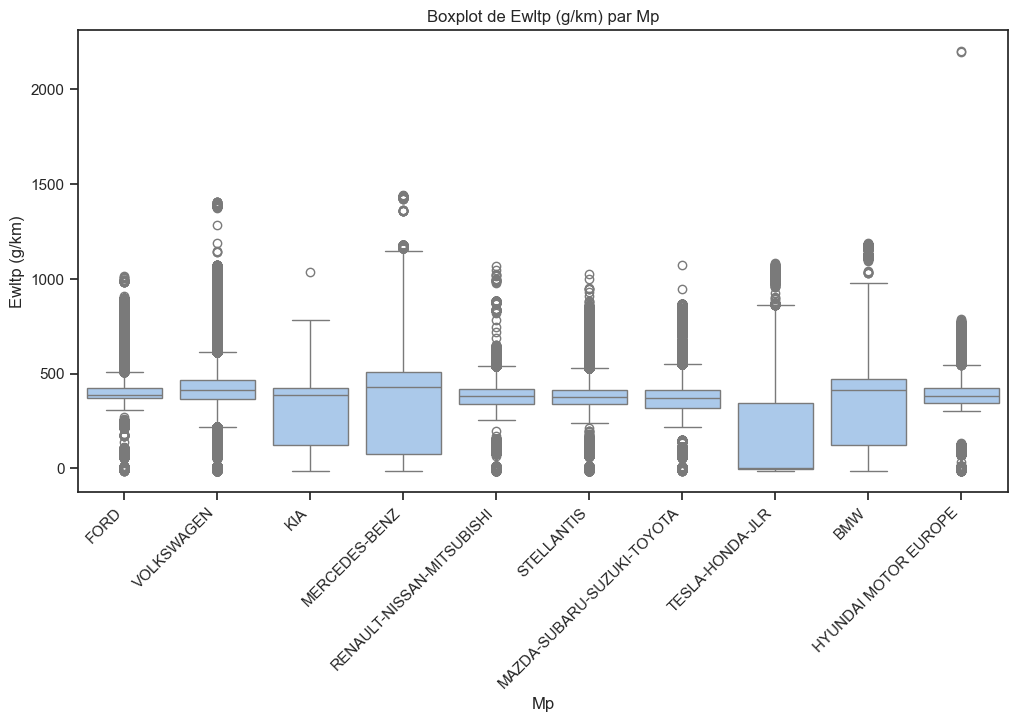

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mp', y='Ewltp (g/km)', data=df)
plt.title('Boxplot de Ewltp (g/km) par Mp')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
from scipy.stats import f_oneway
# Effectuer l'ANOVA
anova_result = f_oneway(*[df.loc[df['Mp'] == mp,'Ewltp (g/km)'] for mp in df['Mp'].unique() if type(mp)!=float])

# Afficher les résultats de l'ANOVA
print("Résultats de l'ANOVA :")
print("Statistique F =", anova_result.statistic)
print("p-valeur =", anova_result.pvalue)

Résultats de l'ANOVA :
Statistique F = 38120.504737963885
p-valeur = 0.0


In [32]:
df.loc[df['Mp'] == "BMW",'Ewltp (g/km)']

2731      425.53
2740      567.24
2899      454.11
3181      593.18
17862     514.15
           ...  
7570126   439.64
7570128   400.24
7570135   393.99
7570518   399.17
7570521   432.47
Name: Ewltp (g/km), Length: 508747, dtype: float64

In [35]:
df["Mp"].unique()

array(['FORD', 'VOLKSWAGEN', 'KIA', 'MERCEDES-BENZ',
       'RENAULT-NISSAN-MITSUBISHI', 'STELLANTIS',
       'MAZDA-SUBARU-SUZUKI-TOYOTA', 'TESLA-HONDA-JLR', nan, 'BMW',
       'HYUNDAI MOTOR EUROPE'], dtype=object)

In [44]:
[df.loc[df['Mp'] == mp,'Ewltp (g/km)'].shape[0] for mp in df['Mp'].unique().tolist() if type(mp)!=float]

[325314,
 1873570,
 346401,
 443200,
 983252,
 1471084,
 577047,
 210769,
 508747,
 346701]

In [42]:
for name in df["Mp"].unique():
    print(type(name))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>


In [20]:
df.loc[df["Mp"].isna(),"Mh"].unique()

array(['TOYOTA MOTOR CORPORATION', 'AA-IVA', 'VOLVO', 'SSANGYONG', 'DFSK',
       'DUPLICATE', 'MASERATI', 'RENAULT TRUCKS', 'OUT OF SCOPE',
       'NEXT EGO MOBILE', 'ALPINA', 'FERRARI', 'MCLAREN',
       'GENERAL MOTORS HOLDINGS', 'POLESTAR', 'ASTON MARTIN', 'GEELY',
       'SAIC MOTOR CORPORATION', 'ANHUI', 'JIANGXI JIANGLING', 'SECMA',
       'CATERHAM', 'LOTUS', 'JIANGLING MOTOR', 'MORGAN', 'DR AUTOMOBILES',
       'NANJING GOLDEN DRAGON', 'LEEH', 'SAIC MAXUS', 'PAGANI',
       'MAHINDRA', 'AA-NSS', 'BYD', 'GREAT WALL MOTOR', 'ZHAOQING', 'NIO',
       'LANZHOU', 'BRILLIANCE SHINERAY', 'CHINA FAW', 'UNKNOWN', 'HAIMA',
       'EURASIA', 'LUCID USA', 'DALLARA', 'HENAN SUDA', 'SMART',
       'LEAPMOTOR', 'DONKERVOORT', 'BUGATTI RIMAC', 'LEVC', 'BUGATTI'],
      dtype=object)

## Correlation

In [ ]:
sns.heatmap(df[col_numericals].corr())
plt.show()

# Target Analysis

## Histogram

In [ ]:
sns.histplot(df,x='Ewltp (g/km)')
plt.show()

## Boxplot


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Ewltp (g/km)'])
plt.show()

## Describe of Target

In [ ]:
df['Ewltp (g/km)'].describe()

## Outliers Analysis

In [ ]:
print(f"On compte près de {df[df['Ewltp (g/km)']<0].shape[0]} individus avec une WLTP inférieur à 0 ce qui est anormal")

In [ ]:
df_avec_target_negative = df[df['Ewltp (g/km)']<0]

### Doublons purs

In [ ]:
print(f" il y a {df_avec_target_negative.duplicated().sum()} doublons purs")


### Doublons impurs
Regarder la donnée à première vue.

In [ ]:
df_avec_target_negative.head()

In [ ]:
selected_columns = [col for col in df_avec_target_negative.columns if col not in ['ID','Ewltp (g/km)','Date of registration']]

duplicate_count = df_avec_target_negative.duplicated(subset=selected_columns).sum()

print(f"Il y a {duplicate_count} individus qui présentent exactement les mêmes caractéristiques (hors colonne 'ID', target et Date of Registration).")


# Analyse par variable des régresseurs
## Mp - Manufacturer Pooling

D'après GPT

le "Manufacturer Pooling" est une stratégie qui permet aux constructeurs automobiles de travailler ensemble pour respecter les réglementations sur les émissions de CO2 en combinant leurs émissions et en partageant les avantages liés à la conformité.

**GARDER**

In [ ]:
valeurs_uniques['Mp']

In [ ]:
df[df['Mp'].isna()].head()

**Comment s'occupe-t-on des valeurs manquantes ?**

On voit que les NaN sont récupérables pour certains avec la colonne `Mh` ou encore `Man`. En fait je sais pas trop, parce qu'il est aussi possible que ça soit déclaré NaN parce que justement il n'apparait pas dedans...

Ex de récupération possible: pour ID 894 on peut voir que Mh= Toyota donc sûrement que Mp = 'MAZDA-SUBARU-SUZUKI-TOYOTA'

In [ ]:
print(f"On compte {df['Mp'].isna().sum()} valeurs manquantes pour 'Mp' ")

## VFN - Vehicle family identification number

D'après ce que j'ai compris c'est un espèce de code d'indentification et de suivi en interne pour les voitures. On peut y trouver comme info: fabricant, le modèle, l'année de fabrication, le pays d'origine, le type de moteur, etc.

Le problème c'est qe je ne vois aps comment on décode ça, puisque généralement c'est interne ou alors propre à chaque marque ? Faudrait creuser mais il est possible que ça puisse nous aider à remplir les NaN qu'on possède

**mon avis**: aucune idée de quoi faire de cette variable, pour l'instant j'en vois pas l'utilité surtout qu'il faut savoir décoder à quoi correspond les codes mdr

**GARDER**: Jynaldo feature extraction (pour l'année)

In [ ]:
nombre_val_unique['VFN']

In [ ]:
valeurs_uniques['VFN'][:10]

In [ ]:
df[df['VFN'].isna()].shape

## Mh -Manufacturer name EU standard denomination
D'après GPT

L'utilisation de cette désignation normalisée aide à garantir la clarté et la cohérence dans la documentation et les réglementations relatives aux véhicules automobiles au sein de l'UE, où de nombreuses marques et fabricants opèrent sur un marché unique.

Chaque fabricant a son propre code "Mh" attribué, de sorte que ces codes sont spécifiques à chaque entreprise et permettent une identification précise des fabricants de véhicules.

**Mon avis**: On garde, 0 NaN, et peut nous aider dans les var catégorielles. A voir ce qu'on en fait plus tard.

**GARDER** (important pour les marques car 0 NaN) pour K means

In [ ]:
nombre_val_unique['Mh']

In [ ]:
valeurs_uniques['Mh'][:10]

In [ ]:
df[df['Mh'].isna()].shape

## Man - Manufacturer name OEM declaration

Pareil 0 Nan on peut garder à mon avis, à voir ce qu'on en fait évidemment.

**GARDER** pour K means

In [ ]:
print(f"On compte {nombre_val_unique['Man']} valeurs uniques et {df[df['Man'].isna()].shape[0]} NaN, quelques exemples de valeurs de Man:\n\n{valeurs_uniques['Man'][:5]}")

## TAN - Type approval number
D'après GPT

Le "Type Approval Number" est un numéro attribué à un produit, généralement dans le domaine de l'automobile, pour indiquer qu'il est conforme aux réglementations et normes spécifiques. Cela garantit sa qualité et sa sécurité pour une utilisation conforme aux normes établies.

l'absence d'un TAN (Type Approval Number) sur un véhicule peut indiquer qu'il n'est pas homologué ou qu'il ne répond pas aux normes réglementaires requises pour être utilisé sur la route. Le TAN est un identifiant qui atteste que le véhicule a été soumis aux tests, vérifications et certifications nécessaires pour garantir sa conformité aux normes de sécurité et d'émissions.

Cependant, il est essentiel de noter que la réglementation peut varier d'un pays à l'autre, et dans certains cas, il peut y avoir des exemptions ou des situations particulières où un véhicule spécifique n'a pas besoin d'un TAN pour être utilisé légalement

**mon avis**: peut-être que les TAN manquant (valeur = NaN) signifient que les véhicules ne sont pas homologués (ils n'ont pas passé les test de conformité). On pourrait peut être aussi créer une colonne "conforme aux normes" avec 0 si non conforme et 1 si conforme (c'est juste une idée)

**GARDER**: faire FE pour créer la colonne `conforme` = 1 si conforme 0 sinon
peut être faire analyse de variance pour voir si corrélation entre conforme et emission.

In [ ]:
print(f"On compte {nombre_val_unique['Tan']} valeurs uniques et {df[df['Tan'].isna()].shape[0]} NaN, quelques exemples de valeurs de Tan:\n\n{valeurs_uniques['Tan'][:5]}")

## T - Type
GPT

Le Type T (ou "Type de modèle") est une classification qui permet d'identifier différents modèles de voitures au sein d'une même marque ou d'un même constructeur. Ces codes permettent aux constructeurs automobiles et aux autorités de suivre et d'identifier clairement chaque modèle de voiture.

Pour connaître la signification d'un code de Type T spécifique, vous devrez généralement consulter les documents officiels du constructeur, tels que les manuels du propriétaire, les sites Web du constructeur, les informations sur les véhicules spécifiques ou contacter directement le service client du constructeur

**GARDER** (pour l'instant regarder en dernier)

In [ ]:
print(f"On compte {nombre_val_unique['T']} valeurs uniques et {df[df['T'].isna()].shape[0]} NaN, quelques exemples de valeurs de T:\n\n{valeurs_uniques['T'][:5]}")

In [ ]:
df['T'].values.tolist()

## Va - Variant

Le code "Va - Variant" pour une voiture se réfère généralement à une variante ou une version spécifique d'un modèle de véhicule. Par exemple, un modèle de base peut avoir plusieurs variantes telles qu'une version de base, une version haut de gamme avec des équipements supplémentaires, une version sportive avec un moteur plus puissant, etc. 

**JETTE**

In [ ]:
print(f"On compte {nombre_val_unique['Va']} valeurs uniques et {df[df['Va'].isna()].shape[0]} NaN, quelques exemples de valeurs de Va:\n\n{valeurs_uniques['Va'][:5]}")

## Ve - Version

Le code "Ve - Version" pour une voiture se réfère généralement à la version spécifique ou à la configuration particulière d'un modèle de véhicule. Les codes de version permettent de catégoriser et d'identifier les différentes versions d'un modèle dans les systèmes de gestion des véhicules. Par exemple, un constructeur automobile peut utiliser un code "Ve" pour indiquer une version de base, tandis qu'un autre code "Ve" peut être associé à une version haut de gamme avec des caractéristiques supplémentaires.

**JETTE**

In [ ]:
print(f"On compte {nombre_val_unique['Ve']} valeurs uniques et {df[df['Ve'].isna()].shape[0]} NaN, quelques exemples de valeurs de Ve:\n\n{valeurs_uniques['Ve'][:5]}")

## Mk - Make

Make fait référence au fabricant ou au constructeur de la voiture. C'est essentiellement le nom de la marque qui produit le véhicule.

A voir ce qu'on en fait c'est une variable catégorielle

**GARDER** pour K means

In [ ]:
print(f"On compte {nombre_val_unique['Mk']} valeurs uniques et {df[df['Mk'].isna()].shape[0]} NaN, quelques exemples de valeurs de Mk:\n\n{valeurs_uniques['Mk'][:5]}")

## Cn - Commercial name

**GARDER** pour K means

In [ ]:
print(f"On compte {nombre_val_unique['Cn']} valeurs uniques et {df[df['Cn'].isna()].shape[0]} NaN, quelques exemples de valeurs de Cn:\n\n{valeurs_uniques['Cn'][:5]}")

## Ct - Category of the vehicle type approved

Ct fait référence à la catégorie dans laquelle un type de véhicule particulier a été homologué ou certifié pour être conforme aux normes réglementaires spécifiques. Par exemple, un code "Ct" indiquant "Passenger Car" (voiture particulière) signifie que le véhicule est homologué en tant que voiture particulière, tandis qu'un code "Ct" indiquant "Light Commercial Vehicle" (véhicule utilitaire léger) indiquerait que le véhicule est homologué en tant que tel. Cela peut influencer diverses réglementations et taxes qui s'appliquent aux véhicules en fonction de leur catégorie.

**mon avis**: On pourrait en faire une variable encodée facilement

selon les réglementations de l'Union européenne. Voici quelques exemples de ces codes :

- M1 : Voiture particulière.
- M1G : Voiture particulière écologique.
- M2 : Véhicule de transport de personnes avec plus de 8 places assises.
- M2G : Véhicule de transport de personnes avec plus de 8 places assises, écologique.
- M3 : Véhicule de transport de personnes avec plus de 8 places assises.
- N1 : Véhicule utilitaire léger (camionnette).
- N1G : Véhicule utilitaire léger (camionnette) écologique.
- N2 : Véhicule utilitaire.
- N2G : Véhicule utilitaire écologique.
- N3 : Véhicule utilitaire.
- L : Deux-roues à moteur.
- L3e : Deux-roues à moteur, catégorie 3 roues.
- L4e : Deux-roues à moteur, catégorie 4 roues.
- L5e : Deux-roues à moteur, catégorie 5 roues.
- L7e : Deux-roues à moteur, catégorie 7 roues.
- L9e : Deux-roues à moteur, catégorie 9 roues.
- L2e : Deux-roues à moteur électriques.

**GARDER**: OHE après traitement des NaN imputation par le mode ou autre chose comme KNN 

In [ ]:
print(f"On compte {nombre_val_unique['Ct']} valeurs uniques et {df[df['Ct'].isna()].shape[0]} NaN, quelques exemples de valeurs de Ct:\n\n{valeurs_uniques['Ct'][:5]}")

In [ ]:
df[df['Ct'].isna()].head()

## Cr - Category of the vehicle registered

Cr est la catégorie du véhicule tel qu'il est enregistré ou immatriculé auprès des autorités locales ou nationales. Cette catégorie est utilisée pour identifier le type de véhicule tel qu'il est effectivement utilisé sur la route et immatriculé par son propriétaire. Elle peut varier en fonction de la législation et des normes d'immatriculation du pays ou de la région.

**mon avis**: Il faudrait trouver comment ranger dans l'ordre ces codes et on pourra en faire une variable label encodée (ordinal encodée)

Chat GPT m'a donné ça(a vérifier):

- M1 - Véhicules automobiles conçus et construits pour le transport de passagers et de leurs bagages, ayant au maximum huit places assises en plus du siège du conducteur. Il s'agit généralement des voitures particulières.

- M1G - Ce code spécifique "G" peut indiquer une sous-catégorie des véhicules M1. Par exemple, il peut être utilisé pour différencier les véhicules M1G équipés de moteurs au gaz.

- M1S - Ce code spécifique "S" peut également indiquer une sous-catégorie des véhicules M1. Il est souvent utilisé pour identifier les véhicules M1S équipés de moteurs électriques ou hybrides.

**GARDER**: OHE et vérifier les significations des codes pour Ct et Cr 

In [ ]:
print(f"On compte {nombre_val_unique['Cr']} valeurs uniques et {df[df['Cr'].isna()].shape[0]} NaN, quelques exemples de valeurs de Cr:\n\n{valeurs_uniques['Cr'][:5]}")

## m (kg) - Mass in running order Completed/complete vehicle

Le terme "m (kg) - Mass in running order Completed/complete vehicle" se réfère au poids d'un véhicule complet et prêt à être utilisé, y compris tous les équipements, les fluides (comme l'huile, le carburant, le liquide de refroidissement, etc.), et d'autres composants nécessaires pour qu'il puisse fonctionner sur la route. Cela inclut également le poids de tout équipement optionnel installé en usine.

**mon avis**: regarder le max, sans doute un outlier

**GARDER**: 
1. Détection outlier
2. Imputation par la médiane


In [ ]:
print(f"On compte {nombre_val_unique['m (kg)']} valeurs uniques et {df[df['m (kg)'].isna()].shape[0]} NaN, quelques exemples de valeurs de m (kg):\n\n{valeurs_uniques['m (kg)'][:5]}")

In [ ]:
df['m (kg)'].describe()

In [ ]:
sns.histplot(df,x='m (kg)')
plt.show()

In [ ]:
filtered_df = df[df["m (kg)"] > df["m (kg)"].quantile(0.75)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["ID"], filtered_df["m (kg)"], c='b', marker='o', label="m (kg)")
plt.xlabel("ID")
plt.ylabel("m (kg)")
plt.title("Scatter Plot de m (kg) pour les valeurs supérieures au 3e quartile")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df[df['m (kg)']>3500].shape

## Enedc (g/km) - Specific CO2 Emissions (NEDC)

Le NEDC est un protocole de test standardisé qui était largement utilisé en Europe pour évaluer les émissions de CO2 et la consommation de carburant des véhicules. Il consiste en une série de cycles de conduite en laboratoire qui simulent différentes conditions de conduite, telles que la conduite en ville, sur autoroute, etc. De nombreux pays ont progressivement abandonné le cycle de conduite NEDC au profit du cycle de conduite WLTP . Par conséquent, les valeurs d'émissions de CO2 mesurées en utilisant le cycle NEDC peuvent être obsolètes pour de nombreux véhicules récents.


**avis**: trop de NaN, et aussi risque de séparabilité parfaite du au fait que NEDC était la norme qui précédait la norme WLTP

**JETTER**

In [ ]:
print(f"On compte {nombre_val_unique['Enedc (g/km)']} valeurs uniques et {df[df['Enedc (g/km)'].isna()].shape[0]} NaN, quelques exemples de valeurs de Enedc (g/km):\n\n{valeurs_uniques['Enedc (g/km)'][:5]}")

## Mt - WLTP test mass

le "Mt - WLTP test mass" est la masse du véhicule telle qu'elle est utilisée lors des tests de conformité WLTP, et elle est conçue pour garantir des résultats de test cohérents et comparables entre les différents véhicules.

La masse de test WLTP est généralement supérieure à la masse en ordre de marche complété (M1) du véhicule, car elle inclut divers équipements de test et charges supplémentaires pour simuler différentes conditions de conduite. Elle est utilisée pour mesurer les émissions de dioxyde de carbone (CO2) et la consommation de carburant d'une manière normalisée et reproductible, de manière à permettre des comparaisons équitables entre différents véhicules.

**mon avis**: peut être important mais grande corrélation avec la variable précédente `m (kg)` Attention aux NaN

**GARDER**: créer une nouvelle colonne en combiannt avec `m (kg)` faire des scatter plot et regarder si c'est une droite etc. Garder pour croiser les sources entre cette variable et la variable précédente.

Pas de traitement individuel pour l'instant (traiter les 2 ensembles )

In [ ]:
print(f"On compte {nombre_val_unique['Mt']} valeurs uniques et {df[df['Mt'].isna()].shape[0]} NaN, quelques exemples de valeurs de Mt:\n\n{valeurs_uniques['Mt'][:5]}")

In [ ]:
df['Mt'].describe()

In [ ]:
sns.histplot(df,x='Mt')
plt.show()

## W (mm) - Wheel Base

"W (mm) - Wheel Base" est la mesure en millimètres de la distance entre les essieux avant et arrière d'un véhicule, et elle a un impact sur le comportement de conduite et d'autres caractéristiques du véhicule.

Une base de roues plus longue tend à offrir une meilleure stabilité à haute vitesse, tandis qu'une base de roues plus courte peut permettre une maniabilité accrue, ce qui est utile dans certaines applications, comme les véhicules utilitaires légers.

**avis**: Attention Outliers

**GARDER**: C'est une pproximation de la longueur du véhicule, on peut l'utiliser pour calculer l'aire du véhicule (FE) on va créer la colonne `surface`
1. Imputation par la médiane

In [ ]:
print(f"On compte {nombre_val_unique['W (mm)']} valeurs uniques et {df[df['W (mm)'].isna()].shape[0]} NaN, quelques exemples de valeurs de W (mm):\n\n{valeurs_uniques['W (mm)'][:5]}")

In [ ]:
df['W (mm)'].describe()

In [ ]:
sns.histplot(df,x='W (mm)')
plt.show()

## At1 (mm) - Axle width steering axle

"At1 (mm)" est la mesure en millimètres de la largeur de l'essieu avant de direction d'un véhicule, ce qui a un impact sur sa maniabilité et sa stabilité. Une largeur d'essieu avant appropriée est essentielle pour permettre au véhicule de tourner efficacement tout en maintenant sa stabilité à différentes vitesses.

**avis**: a voir ce qu'on fera de cette variable, je doute qu'elle soit utile mais bon

**GARDER**: On calcule surface du véhicule avec
1. imputation par la moyenne
Pas besoin de traiter outliers (à priori)

In [ ]:
print(f"On compte {nombre_val_unique['At1 (mm)']} valeurs uniques et {df[df['At1 (mm)'].isna()].shape[0]} NaN, quelques exemples de valeurs de At1 (mm):\n\n{valeurs_uniques['At1 (mm)'][:5]}")

In [ ]:
df['At1 (mm)'].describe()

In [ ]:
sns.histplot(df,x='At1 (mm)')
plt.show()

## At2 (mm) - Axle width other axle

Skip c'est pareil

**GARDER** calculer la surface avec 
1. Imputation par la moyenne
2. Pas d'outliers à traiter 

In [ ]:
print(f"On compte {nombre_val_unique['At2 (mm)']} valeurs uniques et {df[df['At2 (mm)'].isna()].shape[0]} NaN, quelques exemples de valeurs de At2 (mm):\n\n{valeurs_uniques['At2 (mm)'][:5]}")

In [ ]:
df['At2 (mm)'].describe()

In [ ]:
sns.histplot(df,x='At2 (mm)')
plt.show()

In [ ]:
print(f"on compte {sum(df['At1 (mm)']==df['At2 (mm)'])} individus avec At1 = At2. \nJe sais pas comment interpréter")

In [ ]:
#exemple
display(df[df['At1 (mm)']==df['At2 (mm)']].iloc[:3])

## Ft - Fuel type

**avis**: Facile a label encoder. Pas besoin de plus de précisions. Attention aux Unknown

**GARDER**: Voir comment s'occuper de 'UNKNOWN' ( déclarer en tant que NaN puis imputation par le mode ?)

regroupper:
1. Electrique
2. Hybride ('PETROL/ELECTRIC', 'DIESEL/ELECTRIC')
3. Essence
4. Diesel ('DIESEL')
5. Biocarburant ('NG-BIOMETHANE', 'HYDROGEN', 'NG','E85')

In [ ]:
print(f"On compte {nombre_val_unique['Ft']} valeurs uniques et {df[df['Ft'].isna()].shape[0]} NaN, quelques exemples de valeurs de Ft:\n\n{valeurs_uniques['Ft'][:11]}")

In [ ]:
df[df['Ft']=='UNKNOWN'].iloc[:10]

In [ ]:
df[df['Ft']=='UNKNOWN'].shape

## Fm - Fuel mode
Fm c'est le mode de fonctionnement du moteur d'un véhicule en ce qui concerne le type de carburant ou d'énergie qu'il utilise. Le mode de carburant détermine la source d'énergie principale qui alimente le moteur. Voici la signification des codes couramment utilisés pour décrire différents modes de carburant :

- 'H' - Hydrogène : Le véhicule fonctionne à l'aide d'hydrogène, généralement dans une pile à combustible, produisant de l'électricité pour alimenter le moteur électrique.

- 'M' - Moteur à combustion interne (essence ou diesel) : Le véhicule utilise un moteur à combustion interne qui brûle de l'essence (Moteur à essence, "M") ou du diesel (Moteur diesel, "D").

- 'P' - Hybride essence/électrique : Le véhicule dispose d'un moteur à essence et d'un moteur électrique, utilisés en combinaison pour améliorer l'efficacité énergétique.

- 'B' - Hybride diesel/électrique : C'est similaire à l'hybride essence/électrique, mais avec un moteur diesel au lieu d'un moteur à essence.

- 'E' - Électrique : Le véhicule fonctionne entièrement à l'électricité, alimenté par des batteries rechargeables.

- 'F' - Gaz naturel comprimé (CNG - Compressed Natural Gas) : Le véhicule utilise du gaz naturel comprimé comme carburant pour propulser le véhicule. C'est une alternative plus respectueuse de l'environnement par rapport aux carburants fossiles traditionnels.

**avis**: facile à encoder. Attention Chat GPT me donne des trucs bizarre concernant la lettre F, il s'enmêle les pinceaux avec F = Hydrogène et H= Hydrogène. Il faudrait creuser avant d'attribuer des valeurs en encodant

**GARDER** analyse bivariés ? Pour voir si hydrogen dans une variable est bien hydrogène dans l'autre variable.
Label encoding

In [ ]:
print(f"On compte {nombre_val_unique['Fm']} valeurs uniques et {df[df['Fm'].isna()].shape[0]} NaN, quelques exemples de valeurs de Fm:\n\n{valeurs_uniques['Fm'][:6]}")

In [ ]:
df[df['Fm'].isna()].iloc[:2]

## ec (cm3) - Engine capacity

ec (cm3) c'est la cylindrée. La cylindrée du moteur est un indicateur important de la taille du moteur et de sa puissance potentielle. Plus la cylindrée est grande, plus le moteur a la capacité de brûler davantage de carburant et de générer plus de puissance. Cependant, une plus grande cylindrée peut également entraîner une consommation de carburant plus élevée.

**mon avis**: gaffe aux outliers. Var numérique intéressante

**GARDER**: Aussi peut être NaN = voiture électrique possiblement imputer par 0 si c'est électrique

In [ ]:
print(f"On compte {nombre_val_unique['ec (cm3)']} valeurs uniques et {df[df['ec (cm3)'].isna()].shape[0]} NaN, quelques exemples de valeurs de ec (cm3):\n\n{valeurs_uniques['ec (cm3)'][:5]}")

In [ ]:
df['ec (cm3)'].describe()

In [ ]:
sns.histplot(df, x='ec (cm3)')
plt.show()

## ep (KW) - Engine power

Engine power c'est la puissance du moteur du véhicule. Cette puissance est généralement mesurée en kilowatts (KW). Elle représente la capacité du moteur à produire de la puissance mécanique, ce qui est essentiel pour propulser le véhicule. Une puissance moteur plus élevée est généralement associée à de meilleures performances, mais elle peut également entraîner une consommation de carburant plus élevée.

**mon avis** attention aux outliers (en haut et en bas)

**GARDER**: traitement des outliers et imputation par la médiane

In [ ]:
print(f"On compte {nombre_val_unique['ep (KW)']} valeurs uniques et {df[df['ep (KW)'].isna()].shape[0]} NaN, quelques exemples de valeurs de ep (KW):\n\n{valeurs_uniques['ep (KW)'][:5]}")

In [ ]:
df['ep (KW)'].describe()

In [ ]:
sns.histplot(df, x='ep (KW)')
plt.show()

In [ ]:
filtered_df = df[df["ep (KW)"] > df["ep (KW)"].quantile(0.75)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["ID"], filtered_df["ep (KW)"], c='b', marker='o', label="ep (KW)")
plt.xlabel("ID")
plt.ylabel("ep (KW)")
plt.title("Scatter Plot de ep (KW) pour les valeurs supérieures au 3e quartile")
plt.grid(True)
plt.legend()
plt.show()

## z (Wh/km) - Electric energy consumption

Consomation électrique des véhicules.

**comment traiter**: on peut se mettre d'accord et dire qu'on attribue la valeur 0 aux véhicules à essence puisqu'ils ne consomment pas d'électricité (on a 5M de NaN). Aussi attention aux outliers (cf scatter plot)

**GARDER**: Mettre a 0 les NaN. Outliers 

    if not hybrid or electric and z= NaN then z=0 else: z= moyenne

In [ ]:
print(f"On compte {nombre_val_unique['z (Wh/km)']} valeurs uniques et {df[df['z (Wh/km)'].isna()].shape[0]} NaN, quelques exemples de valeurs de z (Wh/km):\n\n{valeurs_uniques['z (Wh/km)'][:5]}")

In [ ]:
df['z (Wh/km)'].describe()

In [ ]:
sns.histplot(df, x='z (Wh/km)')
plt.show()

In [ ]:
filtered_df = df[df["z (Wh/km)"] > df["z (Wh/km)"].quantile(0.75)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["ID"], filtered_df["z (Wh/km)"], c='b', marker='o', label="z (Wh/km)")
plt.xlabel("ID")
plt.ylabel("z (Wh/km)")
plt.title("Scatter Plot de z (Wh/km) pour les valeurs supérieures au 3e quartile")
plt.grid(True)
plt.legend()
plt.show()

## IT - Innovative technology or group of innovative technologies

Innovative technology: cette désignation est utilisée pour indiquer que le véhicule est équipé de nouvelles technologies ou de solutions innovantes qui peuvent améliorer la sécurité, l'efficacité énergétique, le confort ou d'autres aspects de la conduite.

**mon avis**: on ne capte rien mdr, je propose carrément de supprimer cette colonne je vois pas comment on pourrait l'utiliser et on a pas le temps de décoder/ chercher à quoi correspond chaque code. Pas la peine d'essayer d'encoder non plus.

**JETER**

In [ ]:
print(f"On compte {nombre_val_unique['IT']} valeurs uniques et {df[df['IT'].isna()].shape[0]} NaN, quelques exemples de valeurs de IT:\n\n{valeurs_uniques['IT'][:5]}")

## Erwltp (g/km) - Emissions reduction through innovative technologies (WLTP)

L'indicateur Erwltp mesure la **réduction** des émissions de CO2 par rapport à une ligne de base établie grâce à l'incorporation de technologies plus propres, plus efficaces et plus respectueuses de l'environnement dans la conception et la fabrication du véhicule. Cette réduction des émissions est exprimée en grammes par kilomètre (g/km) et indique l'efficacité environnementale du véhicule en termes de réduction des émissions de CO2 lorsqu'il est testé selon le cycle de conduite WLTP.

**avis**: jsp quoi en penser

**METTRE DE COTE**

In [ ]:
print(f"On compte {nombre_val_unique['Erwltp (g/km)']} valeurs uniques et {df[df['Erwltp (g/km)'].isna()].shape[0]} NaN, quelques exemples de valeurs de Erwltp (g/km):\n\n{valeurs_uniques['Erwltp (g/km)'][:5]}")

## Country

**JETER**

In [ ]:
print(f"On compte {nombre_val_unique['Country']} valeurs uniques et {df[df['Country'].isna()].shape[0]} NaN, quelques exemples de valeurs de Country:\n\n{valeurs_uniques['Country'][:5]}")

## Date of registration

**avis**: aucune idée de ce qu'on en fait. Je pense qu'on peut les jeter, à cause de ça on a plein de doublons qui devraient être impurs et qui ne le sont pas car la date diffère

**Jeter**

In [ ]:
print(f"On compte {nombre_val_unique['Date of registration']} valeurs uniques et {df[df['Date of registration'].isna()].shape[0]} NaN, quelques exemples de valeurs de Date of registration:\n\n{valeurs_uniques['Date of registration'][:5]}")

## "Fuel consumption "

Attention il y a un espace a la fin..


**GARDER**: if non (hybrid ou essence ou diesel) then: 0. Else: imputation par la moyenne.

Attention outliers

In [ ]:
print(f"On compte {nombre_val_unique['Fuel consumption ']} valeurs uniques et {df[df['Fuel consumption '].isna()].shape[0]} NaN, quelques exemples de valeurs de Fuel consumption :\n\n{valeurs_uniques['Fuel consumption '][:5]}")

In [ ]:
df["Fuel consumption "].describe()

In [ ]:
filtered_df = df[df["Fuel consumption "] > df["Fuel consumption "].quantile(0.75)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["ID"], filtered_df["Fuel consumption "], c='b', marker='o', label="Fuel consumption ")
plt.xlabel("ID")
plt.ylabel("Fuel consumption ")
plt.title("Scatter Plot de Fuel consumption  pour les valeurs supérieures au 3e quartile")
plt.grid(True)
plt.legend()
plt.show()

## Electric range (km)

L'Electric Range (km) en automobile fait référence à l'autonomie d'un véhicule électrique, c'est-à-dire à la distance maximale que le véhicule peut parcourir en utilisant uniquement sa batterie électrique sans recourir à un moteur à combustion interne ou à un autre moyen de propulsion.

**mon avis**: faire attention car on a 2 variables electric range (une en Wh/km et une en km)

**GARDER**:  if non (hybrid ou essence ou diesel) then: 0. Else: imputation par la *médiane*.

In [ ]:
print(f"On compte {nombre_val_unique['Electric range (km)']} valeurs uniques et {df[df['Electric range (km)'].isna()].shape[0]} NaN, quelques exemples de valeurs de Electric range (km):\n\n{valeurs_uniques['Electric range (km)'][:5]}")

In [ ]:
df['Electric range (km)'].describe()

In [ ]:
filtered_df = df[df["Electric range (km)"] > df["Electric range (km)"].quantile(0.75)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["ID"], filtered_df["Electric range (km)"], c='b', marker='o', label="Electric range (km)")
plt.xlabel("ID")
plt.ylabel("Electric range (km)")
plt.title("Scatter Plot de Electric range (km) pour les valeurs supérieures au 3e quartile")
plt.grid(True)
plt.legend()
plt.show()